# EXPLORATORY DATA ANALYSIS
### -Data Magician Team-
##### Dataset : datatrain from (https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction)

### Data and Library Import

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [148]:
dftrain = pd.read_csv('train_20D8GL3.csv')
dftrain.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
dftrain['SEX']=dftrain['SEX'].replace({1 : 'male', 2 : 'female'})
dftrain['EDUCATION'] = dftrain['EDUCATION'].replace({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown', 0 : 'others'})
dftrain['MARRIAGE']= dftrain['MARRIAGE'].replace({1 : 'married', 2 : 'single', 3 : 'divorced', 0 : 'others'})
pay_data = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in pay_data:
    dftrain[i] = dftrain[i].astype('object')

In [149]:
dftrain.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
17869,25956,150000,female,university,married,42,0,0,0,0,...,4823,6208,4824,1300,1040,1378,1560,128,239,0
17274,9462,500000,female,graduate school,married,30,0,0,-1,0,...,10403,2293,2702,1015,5584,6348,46,2702,4648,0
1441,20984,20000,male,university,single,34,2,2,2,0,...,19492,19859,19232,3500,0,1500,805,7000,542,1
7586,24916,200000,male,graduate school,divorced,47,0,0,0,0,...,186981,137486,140473,7208,7282,5835,5000,5500,4954,1
13008,23773,80000,female,high school,married,54,0,0,0,0,...,24500,28900,29400,2000,2000,1600,5000,1000,600,0


### Handle missing values

In [150]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          21000 non-null  int64 
 1   LIMIT_BAL                   21000 non-null  int64 
 2   SEX                         21000 non-null  object
 3   EDUCATION                   21000 non-null  object
 4   MARRIAGE                    21000 non-null  object
 5   AGE                         21000 non-null  int64 
 6   PAY_1                       21000 non-null  object
 7   PAY_2                       21000 non-null  object
 8   PAY_3                       21000 non-null  object
 9   PAY_4                       21000 non-null  object
 10  PAY_5                       21000 non-null  object
 11  PAY_6                       21000 non-null  object
 12  BILL_AMT1                   21000 non-null  int64 
 13  BILL_AMT2                   21000 non-null  in

In [151]:
print(f'Terdapat missing data sebanyak {dftrain.isnull().sum().sum()}')

Terdapat missing data sebanyak 0


Dari data di atas diketahui :

1. Dataframe terdiri 21000 baris

2. Tidak ada kolom yang memiliki nilai null/missing value

3. Terdapat beberapa tipe data kategorikal yang belum diubah value nya (masih dalam bentuk data numerikal)

In [152]:
cats = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
nums = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for i in cats:
    print(f'Value count kolom {i}:')
    print(dftrain[i].value_counts())
    print()
# cek nilai tipe data kategori, apakah masih ada yang belum terdefinisi

Value count kolom SEX:
female    12759
male       8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
university         9789
graduate school    7415
high school        3467
unknown             234
others               95
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
single      11184
married      9561
divorced      219
others         36
Name: MARRIAGE, dtype: int64

Value count kolom PAY_1:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     30

**STATISTICAL SUMMARY**

In [153]:
dftrain[cats].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,2,5,4,11,11,11,10,10,10
top,female,university,single,0,0,0,0,0,0
freq,12759,9789,11184,10324,11043,11056,11542,11852,11450


Berdasarkan hasil pengamatan di atas :

1. Data didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan untuk kolom SEX, single untuk kolom MARRIAGE, berhasil bayar untuk kolom default_payment_next_month, nilai 0 untuk kolom PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 dan PAY_6

In [154]:
dftrain[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,35.461619,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,128965.188482,9.206628,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,10000.000000,21.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,140000.000000,34.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,800000.000000,75.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


Beberapa pengamatan Sementara:

1. Tampaknya ada issue pada nilai minimal untuk kolom BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 (bernilai negatif), akan di-(?) di langkah selanjutnya

2. Kolom dengan tipe data numerikal, tampaknya skew ke kanan (long-right tail, mean > median)

### Handle duplicated data

In [155]:
print(f'Jumlah baris data duplikat = {dftrain.duplicated().sum()}')

Jumlah baris data duplikat = 0


Tidak ada data duplikat.

### Split data

In [156]:
ind_var = dftrain.drop('default_payment_next_month',axis = 1)
ind_var = ind_var.columns.to_list() #kolom independent variable

In [157]:
X = dftrain[ind_var]
y = dftrain[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Handle outliers

Sebelum dilakukan penanganan nilai outlier, akan dicek terlebih dahulu distribusi dari tiap feature agar dapat ditentukan penanganan yang tepat.

<AxesSubplot:xlabel='AGE'>

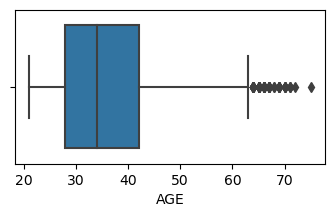

In [158]:
# Check Age Distribution
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x = X_train['AGE'], ax = ax)

<AxesSubplot:xlabel='LIMIT_BAL'>

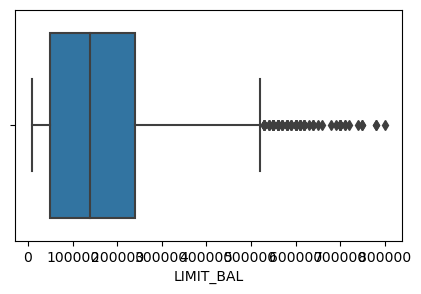

In [159]:
# Checking LIMIT_BAL outliers
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x = X_train['LIMIT_BAL'], ax = ax)

Jika dilihat dari nilai upper bound (Q3 + 1.5*IQR), terdapat outlier pada feature AGE, dan LIMIT_BAL.

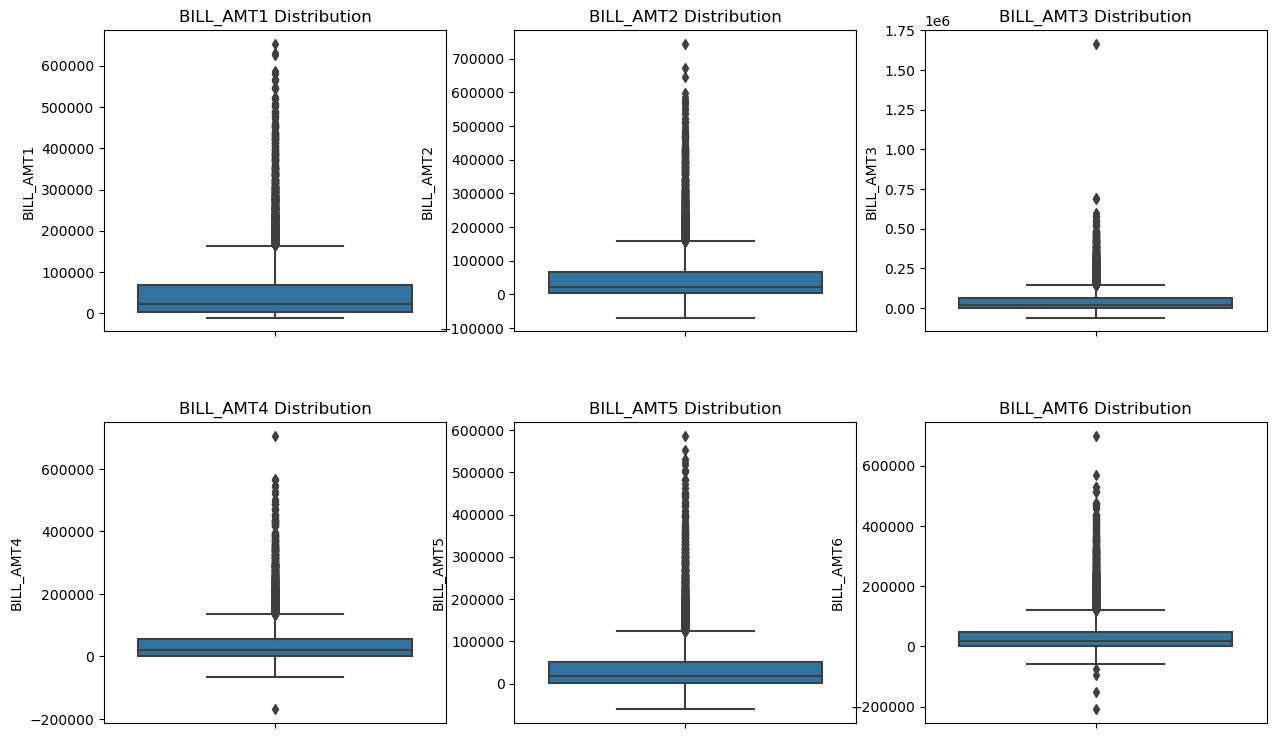

In [160]:
# BILL BOX PLOT
bill_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(15, 9))

sns.boxplot(y = X_train['BILL_AMT1'], ax = axs[0,0])
axs[0,0].set_title('BILL_AMT1 Distribution')
sns.boxplot(y = X_train['BILL_AMT2'], ax = axs[0,1])
axs[0,1].set_title('BILL_AMT2 Distribution')
sns.boxplot(y = X_train['BILL_AMT3'], ax = axs[0,2])
axs[0,2].set_title('BILL_AMT3 Distribution')
sns.boxplot(y = X_train['BILL_AMT4'], ax = axs[1,0])
axs[1,0].set_title('BILL_AMT4 Distribution')
sns.boxplot(y = X_train['BILL_AMT5'], ax = axs[1,1])
axs[1,1].set_title('BILL_AMT5 Distribution')
sns.boxplot(y = X_train['BILL_AMT6'], ax = axs[1,2])
axs[1,2].set_title('BILL_AMT6 Distribution')

bill_boxplot.subplots_adjust(hspace=0.3)

Terdapat outlier pada feature BILL_AMT3, dan BILL_AMT 6 yang ekstrim, dan hal ini mungkin akan menurunkan performa model prediksi. Dan pada feature BILL_AMT1 hingga BILL_AMT6 terdapat nilai negatif, dimana data ini dapat menunjukkan adanya sejumlah pembayaran berlebih pada bulan-bulan sebelumnya.

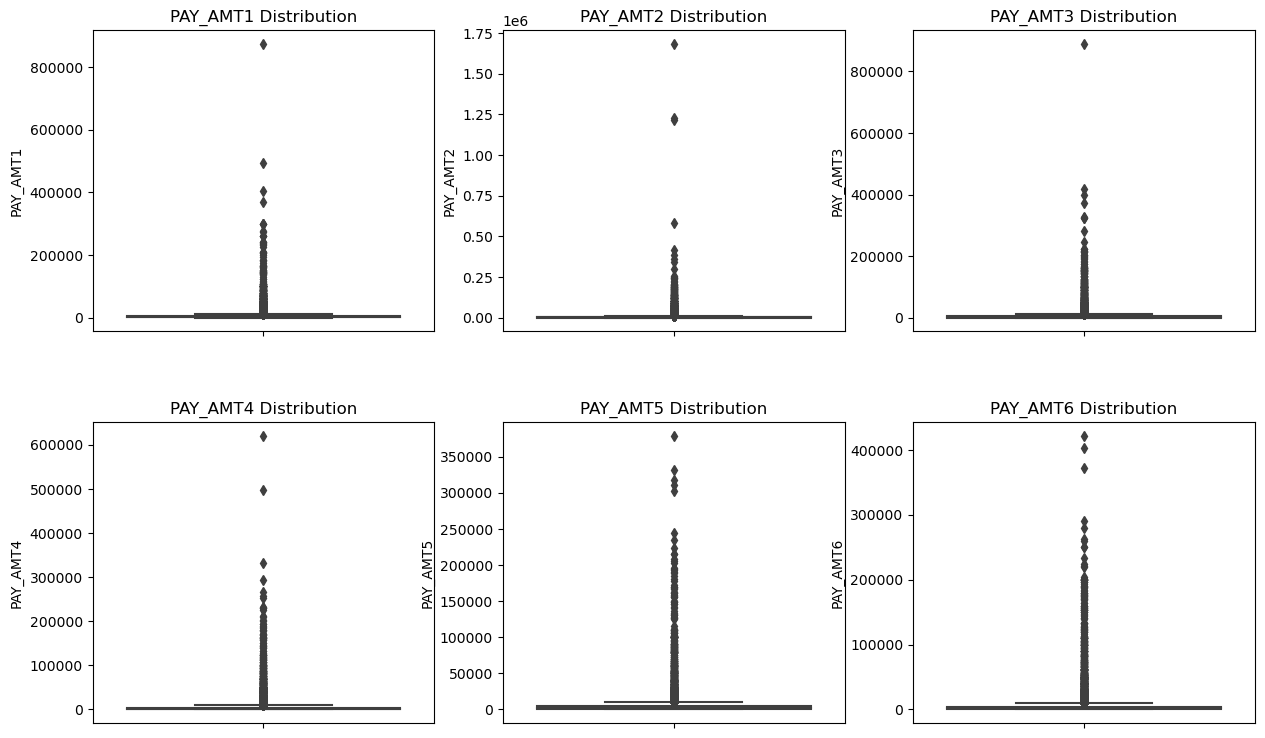

In [161]:
# PAY BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(15, 9))

sns.boxplot(y = X_train['PAY_AMT1'], ax = axs[0,0])
axs[0,0].set_title('PAY_AMT1 Distribution')
sns.boxplot(y = X_train['PAY_AMT2'], ax = axs[0,1])
axs[0,1].set_title('PAY_AMT2 Distribution')
sns.boxplot(y = X_train['PAY_AMT3'], ax = axs[0,2])
axs[0,2].set_title('PAY_AMT3 Distribution')
sns.boxplot(y = X_train['PAY_AMT4'], ax = axs[1,0])
axs[1,0].set_title('PAY_AMT4 Distribution')
sns.boxplot(y = X_train['PAY_AMT5'], ax = axs[1,1])
axs[1,1].set_title('PAY_AMT5 Distribution')
sns.boxplot(y = X_train['PAY_AMT6'], ax = axs[1,2])
axs[1,2].set_title('PAY_AMT6 Distribution')

pay_boxplot.subplots_adjust(hspace=0.3)

Terdapat nilai outlier yang sangat ekstrim pada feature PAY_AMT1 hingga PAY_AMT6, sehingga perlu dilakukan penanganan dengan penghapusan nilai outliers agar performa model dapat optimal.

Selanjutnya akan dilakukan drop baris yang memiliki data outlier dengan metode IQR.

In [162]:
# Outliers handling

print(f'Jumlah baris sebelum memfilter outlier : {len(X_train)}')

for i in nums:
    q1 = X_train[i].quantile(0.25)
    q3 = X_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((X_train[i] >= low_limit) & (X_train[i] <= high_limit))
    
X_train = X_train[filtered_entries] #filter untuk hanya mengambil value z-score < 3

print(f'Jumlah baris setelah memfilter outlier : {len(X_train)}')

Jumlah baris sebelum memfilter outlier : 14700
Jumlah baris setelah memfilter outlier : 13245


### Feature transformation

In [163]:
#menggunakan standardization (scaler)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X[nums].columns.to_list()
for i in numerical_features:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [164]:
X_train[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04
mean,8.502909e-17,7.188579e-17,6.491179e-17,-1.072922e-17,-3.808874e-17,1.609383e-17,2.575013e-17,9.870884e-17,1.287507e-17,-1.180214e-17,3.111474e-17,-2.145844e-18,-1.180214e-17,6.544826e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.207694e+00,-1.554403e+00,-9.069789e-01,-1.881413e+00,-1.516596e+00,-3.860511e+00,-1.758329e+00,-2.613412e+00,-3.451685e-01,-2.793835e-01,-3.130672e-01,-3.059016e-01,-3.175540e-01,-8.883237e-01
25%,-8.767557e-01,-7.997478e-01,-6.880194e-01,-6.917238e-01,-6.854665e-01,-6.817431e-01,-6.848557e-01,-6.850646e-01,-2.921459e-01,-2.427181e-01,-2.888627e-01,-2.918868e-01,-3.048103e-01,-8.883237e-01
50%,-2.148787e-01,-1.529007e-01,-4.046387e-01,-4.015007e-01,-3.924846e-01,-3.749521e-01,-3.647517e-01,-3.725607e-01,-1.980878e-01,-1.626147e-01,-1.935298e-01,-2.017913e-01,-1.992923e-01,-3.840434e-01
75%,5.297329e-01,6.017542e-01,2.575117e-01,2.541929e-01,2.438834e-01,2.186872e-01,2.423557e-01,2.597855e-01,1.003132e-02,-2.418523e-02,-1.956947e-02,-2.560449e-02,-2.020059e-02,4.869863e-01
max,5.162872e+00,4.267221e+00,9.601554e+00,1.030378e+01,1.109309e+01,1.234613e+01,9.221079e+00,9.933033e+00,3.593654e+01,7.136309e+01,2.916976e+01,3.949629e+01,2.603093e+01,3.612149e+00


In [165]:
X_test[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000
mean,0.073813,-0.006453,0.065124,0.068442,0.076204,0.071951,0.070733,0.070726,0.067114,0.052919,0.057117,0.078005,0.093899,1.479522
std,1.060059,0.989117,1.140505,1.132845,1.161762,1.158766,1.165245,1.170730,1.144832,1.043682,1.168414,1.224074,1.431407,8.584819
min,-1.207694,-1.554403,-0.965621,-1.844414,-3.421312,-2.221742,-2.316781,-1.492926,-0.345169,-0.279384,-0.313067,-0.305902,-0.317554,-0.888324
25%,-0.876756,-0.799748,-0.680574,-0.682807,-0.679815,-0.676790,-0.678941,-0.681995,-0.271628,-0.224385,-0.283665,-0.281736,-0.300562,-0.842480
50%,-0.132144,-0.152901,-0.381152,-0.376155,-0.378714,-0.364657,-0.355368,-0.355666,-0.190697,-0.162002,-0.179423,-0.185774,-0.190117,-0.200669
75%,0.695202,0.601754,0.335094,0.332727,0.333616,0.307911,0.273066,0.284366,0.022533,0.012539,0.014250,0.014438,0.022278,0.945423
max,5.328341,4.267221,11.085856,9.225205,11.093365,10.682184,10.087846,9.340423,23.409390,23.132944,29.457835,26.265306,35.194089,241.471554


###### Untuk skala pada nilai data train dan test sudah sama

### Feature encoding


Feature SEX akan dilakukan label encoding.

In [166]:
# Feature encoding for SEX column
X['SEX']=X['SEX'].replace({'male' : 0,'female' : 1})

C:\Users\sutoy\AppData\Local\Temp\ipykernel_7960\3883117009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SEX']=X['SEX'].replace({'male' : 0,'female' : 1})


Pada feature MARRIAGE akan dilakukan label encoding dan dikerucutkan kembali menjadi dua kategori yaitu 'in_relationship'(1) yang berisi data yang berkategori 'married', dan 'not_in_relationship'(0) yang berisi data dengan kategori 'single', 'divorce', atau '0'.

In [167]:
X['MARRIAGE']= X['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})

C:\Users\sutoy\AppData\Local\Temp\ipykernel_7960\821778338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MARRIAGE']= X['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})


Pada Feature Education akan dikerucutkan kembali menjadi dua ketegori yaitu educated (1) dan others (0), kemudian dilakukan label encoding untuk menghindari model yang terlalu kompleks dan terlalu banyak feature yang tidak relevan.

In [168]:
X['EDUCATION'] = X['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})

C:\Users\sutoy\AppData\Local\Temp\ipykernel_7960\883163326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['EDUCATION'] = X['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})


Untuk feature payment_default_next_month akan dikembalikan kambali menjadi 'Yes'(1), dan 'No'(0).

In [169]:
# Checking current dataset
X.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,25150,360000,1,1,0,25,-1,-1,-1,-1,...,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,13470,240000,1,1,0,46,2,2,-2,-1,...,0,2240,1681,2267,0,0,2240,0,2267,3074
2,3092,320000,1,1,1,41,0,0,0,0,...,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,13973,50000,1,1,0,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4,10567,80000,0,1,1,52,-1,0,0,0,...,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


In [146]:
for i in cats:
    print(f'Value count kolom {i}:')
    print(X[i].value_counts())
    print()

Value count kolom SEX:
1    12759
0     8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
1    20671
0      329
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
0    11439
1     9561
Name: MARRIAGE, dtype: int64

Value count kolom PAY_1:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    11852
-1     

### Handle class imbalance

In [173]:
#check apakah variable target memiliki data yang imbalance?
y_train.value_counts()

default_payment_next_month
0                             11463
1                              3237
dtype: int64

In [176]:
#penentuan variable (x) independen dengan variable (y) dependen
x = X_train[[i for i in X[nums]]].values
y = y_train.values

In [182]:
#balancing over and under sampling through imblearn

from imblearn import under_sampling, over_sampling

x_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
x_over_smote, y_over_smote = over_sampling.SMOTE(0.5).fit_resample(x, y)

print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())

TypeError: __init__() takes 1 positional argument but 2 were given